In [1]:
import numpy as np
from numpy import random as rd

import tqdm
from matplotlib import pyplot as plt
from scipy.special import gamma
import tqdm

In [80]:
#Esta es la forma analitica de la accion
#las lineas van desde y0 hasta yN, osea hay N-1 puntos intermedios
def generar_lineas(n_lines = 100000, N = 5, y0 = 0, yN = 1):

    w = rd.normal(scale = 1 / np.sqrt(2),size = (n_lines,N-1))
    w = np.hstack([np.array([[y0]*n_lines]).T, w, np.array([[yN]*n_lines]).T])

    z = w[:]
    
    for i in range(1,N):
        z[:,i] = w[:,i] * np.sqrt(i / (i+1)) * np.sqrt(4 / N)
        
    else:
        y = z[:]
        
    for i in range(1,N)[::-1]:
        y[:,i] = z[:,i] + y0 / (i + 1) + (i / (i+1))*y[:,i+1]
        
    return y

def return_accion(S,delta,N):
    def return_accion_(S,delta,N):
        return ((S - delta**2 /4 )**(-1 + (N-1) / 2)) * np.exp(-(S - delta**2 / 4)) / gamma((N-1) / 2)

    to_return  =  (S > delta**2 /4 )
    no_return  =  ~to_return

    return np.hstack([np.zeros(no_return.sum()),return_accion_(S[to_return], delta, N)])

def generar_accion(y):
    
    N = y.shape[1] - 1
    accion = (y[:,1:] - y[:,:-1])**2
    accion = (accion*(N / 4)).sum(axis = 1)
    
    return accion

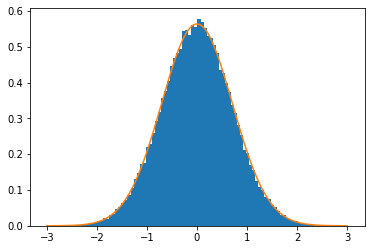

In [3]:
x = np.linspace(-3,3,200)
w = rd.normal(scale = 1 / np.sqrt(2),size = 100000)

plt.hist(w, bins= 100, density = True)
plt.plot(x, np.exp(-x**2) / np.sqrt(np.pi))
plt.show()

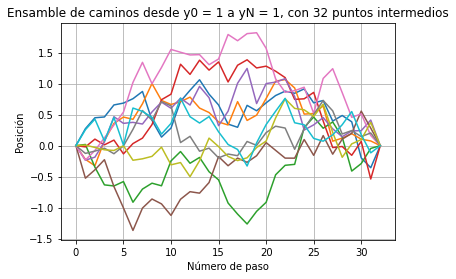

In [4]:
#Las lineas se comportan bien?
y = generar_lineas(N = 32, yN = 0, n_lines = 10)

for plot in y:
    plt.plot(plot)
    
plt.title('Ensamble de caminos desde y0 = 1 a yN = 1, con {} puntos intermedios'.format(y.shape[1] - 1))
plt.xlabel('Número de paso')
plt.ylabel('Posición')
plt.grid()

# Son gaussianas?

In [5]:
y = generar_lineas(N = 10, yN = 10, n_lines = 100000)

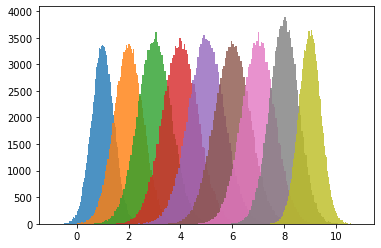

In [6]:
for j in range(1,y.shape[1]-1):
    plt.hist(y[:,j], bins = 100, alpha = 0.8)

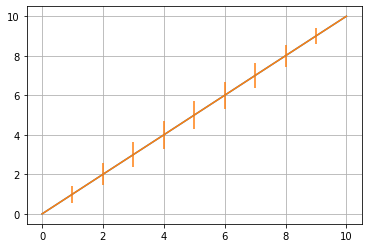

In [7]:
#tienen como valor medio el punto medio del camino
plt.plot(y.mean(axis = 0))
plt.errorbar(range(y.shape[1]),y.mean(axis = 0),  y.std(axis = 0))
plt.grid()
plt.show()

# Graficar la evolucion de la accion

In [68]:
# y = generar_lineas(N = 10, yN = 0, n_lines = 10**8)
# np.save('10e8_10', y)

y = np.load('10e8_10.npy')
N = 10

In [69]:
choices = np.random.choice(np.arange(10**8, dtype = int), size=int(10**7), replace=False) 
y = y[choices]

In [71]:
indices = []
acciones = []
len_indices = []

for sample in tqdm.tqdm(np.logspace(2,5,200)):
    choices = np.random.choice(np.arange(10**7, dtype = int), size=int(sample), replace=False) 
    indices.append(choices)
    
for index in indices:
    acciones.append(generar_accion(y[index]).mean())
    len_indices.append(len(index))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:26<00:00,  2.32it/s]


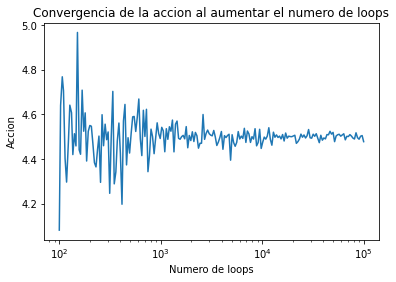

In [74]:
plt.plot(len_indices,acciones)
plt.xscale('log')

plt.xlabel('Numero de loops')
plt.ylabel('Accion')

plt.title('Convergencia de la accion al aumentar el numero de loops')
plt.show()

# calculo de la accion

In [82]:
del N

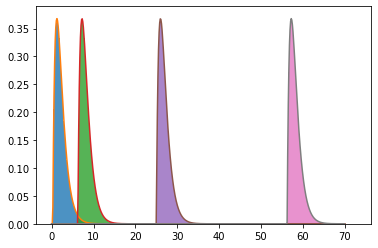

In [85]:
S = np.linspace(0,70,500)
N = 5
delta = 0

for delta in [1,5,10,15]:
    y = generar_lineas(N = 5, yN = delta, n_lines = 200000)
    plt.hist(generar_accion(y), bins = 100, density = True, alpha = 0.8)
    plt.plot(S,return_accion(S,delta,5))

# Guardo los deltas